# Projet d'Optimisation - Rangement d'un tuyau de jardin

# Enol Alvarez & Louis-Justin Tallot

## 1. Etude du problème d'optimisation

#### Q1) Interpréter le coût (4). Que cherche-t-on à minimiser ?

On cherche $min \left(K\left(x_N - \dfrac{L}{2}\right)^2 + \text{d}x^2 \sum \limits _{i=0}^N y_i^2   \right)$

Le premier terme correspond à la distance au parterre de fleurs et le deuxième à la distance à l'axe horizontal.

#### Q2) Pourquoi n'a-t-on pas plutôt imposé la contrainte $x_N = L/2$ ?

#### Q3) Interpréter géométriquement la condition de courbure (5)

On impose une courbure maximale avec : 

$$
    (x_{i+1} - 2x_i + x_{i-1})^2 + (y_{i+1} - 2y_i + y_{i-1})^2 \leq \text{d}x^4 \gamma^2
$$

Pour justifier cette expression, on commence par paramétriser la trajectoire. Celle-ci est définie par:

$$
    f(t) = (x(t), y(t))
$$ 
avec 
$$(x(n), y(n)) = (x_n, y_n)$$ pour n entier < N 

La courbure moyenne locale d'une fonction est donnée par son laplacien (qui correspond à la dérivée seconde pour une fonction réelle). La condition de courbure revient alors à majoré la norme du Laplacien :

$$
\|\Delta f\|^2 \leq  \gamma^2
$$
$$
\|\Delta x\|^2 + \|\Delta y\|^2 \leq \gamma^2
$$

L'expession du laplacien pour une fonction discrète prend la forme:

$$
\Delta x = \frac{\frac{(x_{i+1} - x_i)}{\text{d}x} - \frac{(x_i - x_{i-1})}{\text{d}x}}{\text{d}x} = \frac{(x_{i+1} - 2x_i + x_{i-1})}{\text{d}x^2}
$$

D'où l'expression finale :

$$
\frac{(x_{i+1} - 2x_i + x_{i-1})^2}{\text{d}x^4} + \frac{(y_{i+1} - 2y_i + y_{i-1})^2}{\text{d}x^4} \leq  \gamma^2
$$

#### Q4) Formuler le problème d'optimisation à résoudre sous la forme 

$$ \min \limits _{c_{eq}(z)=0,\; c_{ineq}(z)=0} f(z)$$

On pose : 

Variables de décision au nombre $n=2N+2$ : 
$$z = (x_0, \dots, x_N , y_0, \dots, y_N)$$  


Contraintes : 

$$
c_{eq}(z) = c_{eq}(x_0, \dots, x_N , y_0, \dots, y_N) \\
          = (x_0, y_0, y_N , (x_1-x_0)^2 + (y_1-y_0)^2-\text{d}x^2, \dots, (x_N-x_{N-1})^2 + (y_N-y_{N-1})^2-\text{d}x^2)
$$


$$
c_{ineq}(z) = c_{ineq}(x_0, \dots, x_N , y_0, \dots, y_N) \\
          = (x_0-x_1, \dots, x_{N-1}-x_N, 
          (x_2-2x_1+x_0)^2+(y_2-2y_1+y_0)^2- \text{d} x ^4 \gamma ^2, \dots, 
        (x_N-2x_{N-1}+x_{N-2})^2+(y_N-2y_{N-1}+y_{N-2})^2- \text{d} x ^4 \gamma ^2)
 $$

Fonction objectif à minimiser : 

$$
  f(z) = f(x_0, \dots, x_N , y_0, \dots, y_N) \\
       = K \left(( _N - \dfrac{L}{2}\right)^2 + \text{d}x^2 \sum_{i=0}^N y_i^2 
$$



## 2. Etude et résolution numériques

In [1]:
import casadi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.utils import io

In [2]:
# nos données
L = 10
N = 60
K = 10
gamma = 3

# on en déduit alors
dx = L/N

In [3]:
def conditions_initiales(L=10, N=60):
    dx = L/N   
    # Condition initiale - triangle rectangle isocèle
    # les y d'abord
    y = []
    res = 0
    while res <= L/(2*np.sqrt(2)):
        y.append(res)
        res += dx / (np.sqrt(2))

    res = L/(2*np.sqrt(2)) - dx/(2*np.sqrt(2))
    while res >= 0:
        y.append(res)
        res -= dx/np.sqrt(2)

    if len(y)<N+1:
        y.append(res)
    x = []
    res = 0

    while res <= L/(np.sqrt(2)):
        x.append(res)
        res += dx/np.sqrt(2)

    if not np.isclose(x[-1], L/(np.sqrt(2))):
        x.append(L/(np.sqrt(2)))

    z0_triangle_haut = np.array(y+x)
    z0_triangle_bas = np.array(list(-1.*np.array(y))+x)

    return z0_triangle_haut, z0_triangle_bas

#### Q5) Quelles méthodes de résolution peuvent être envisagées pour ce problème ?

On se trouve ici face à un problème d'optimisation avec des contraintes égalité et inégalité. 

On pourrait opter par un algorithme SQP, car on peut réecire la fonction $f$ comme une fonction quadratique, mais les contraintes ne sont pas toutes affines. La matrice obtenue pour les terme quadratique est positive mais n'est pas définie, ce qui pourrait poser problème pour la résolution.

On peut aussi envisager l'application de l'algorithme d'Uzawa. Cependant cet algorithme admet uniquement des contraintes inégalités (tel qu'on l'a vu dans le cours), il suffit alors de remplacer chaque contrainte égalité par 2 contraintes inégalité (l'une $\leq 0$ et l'autre $\geq 0$)

#### Q6) Développer un algorithme de résolution pour les valeurs numériques suivantes : $L = 10$ ; $N = 60$ ; $K= 10$ et $\gamma = 3$

In [4]:
# Condition initiale - triangle rectangle isocèle
# les y d'abord
y = []
res = 0
while res <= L/(2*np.sqrt(2)):
    y.append(res)
    res += dx / (np.sqrt(2))

res = L/(2*np.sqrt(2)) - dx/(2*np.sqrt(2))
while res >= 0:
    y.append(res)
    res -= dx/np.sqrt(2)

# puis les x

x = []
res = 0

while res <= L/(np.sqrt(2)):
    x.append(res)
    res += dx/np.sqrt(2)
x.append(L/(np.sqrt(2)))

z0 = np.array(y+x)

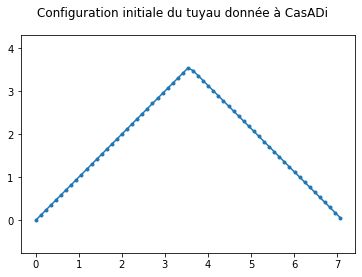

In [5]:
X = [z0[i] for i in range(N+1, 2*N+2)]
Y = [z0[i] for i in range(0, N+1)]
plt.plot(X, Y, marker='.')
plt.suptitle("Configuration initiale du tuyau donnée à CasADi")
plt.axis("equal")
plt.show()

In [45]:
def optim_simple(L=10, N=60, K=10, gamma=3, z0=None, plot=True, verbose=False, must_return=False):
    dx = L/N

    if z0 is None:
        z0 = conditions_initiales(L, N)[0]

    # on lance une optimisation avec CasADi
    opti = casadi.Opti()
    # nombre de variables : 
    n = 2 * N + 2
    # notre variable d'optimisation dans CasADi, avec nos notations : 
    z = opti.variable(n)
    # notre fonction à minimiser : 
    f = 0
    # on met les y d'abord : 
    for i in range(N+1):
        f += dx**2 *z[i]**2

    f += K * (z[-1] - L/2)**2

    # on veut minimiser
    opti.minimize(f)
    # on rajoute les contraintes égalité
    opti.subject_to(z[0] == 0) # y_0
    opti.subject_to(z[N] == 0) # y_N
    opti.subject_to(z[N+1] == 0) # x_0

    for i in range(N):
        opti.subject_to((z[N+1 + i+1]-z[N+1 + i])**2 + (z[i+1]-z[i])**2 - dx**2 == 0)

    # on rajoute les contraintes inégalité
    for i in range(N):
        opti.subject_to(z[N+1 + i] - z[N+1 + i+1] <= 0)
        opti.subject_to(z[1] >= 0)

    for i in range(N-1):
        opti.subject_to((z[N+1 + i+2] - 2*z[N+1 + i+1] + z[N+1 + i])**2 + (z[i+2] - 2*z[i+1] + z[i])**2 - dx**4 * gamma**2 <= 0)    


    # CI
    opti.set_initial(z,z0)

    # on résoud
    opti.solver('ipopt')

    if verbose:
        sol = opti.solve()
    else:
        with io.capture_output() as captured:
            sol = opti.solve()

    result = sol.value(z)

    if plot:
        plt.figure()
        X = [result[i] for i in range(N+1, 2*N+2)]
        Y = [result[i] for i in range(0, N+1)]
        plt.plot(X, Y, marker='.')
        plt.axis('equal')
        plt.suptitle("Configuration optimale du tuyau trouvée par CasADi")
        plt.show()

    if must_return:
        return result


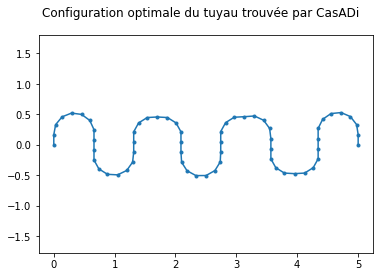

In [46]:
optim_simple()

#### Q7) Refaire les simulations avec des valeurs différentes de K ?

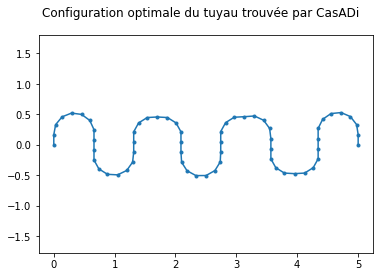

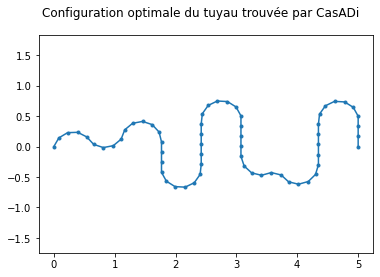

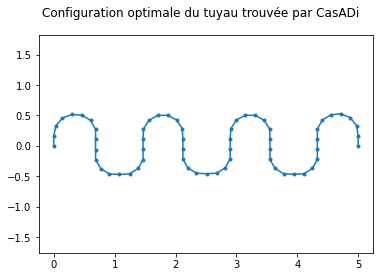

In [8]:
optim_simple(K=10)
optim_simple(K=100)
optim_simple(K=10000)

#### Q8) Refaire les simulations avec des valeurs différentes de N?

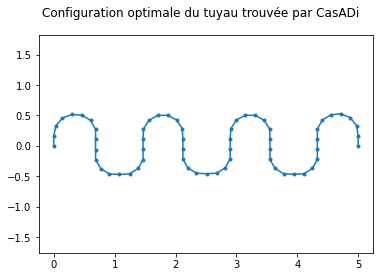

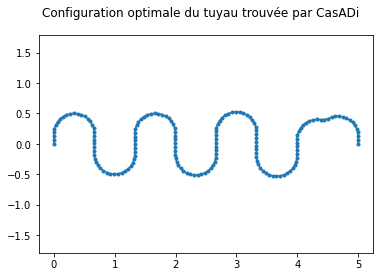

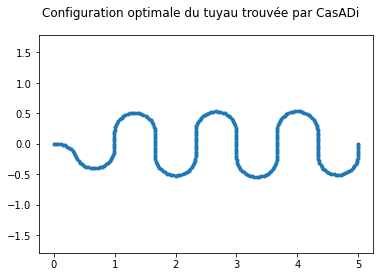

In [9]:
optim_simple(N=60, K=10000)
optim_simple(N=160, K=10000)
optim_simple(N=260, K=10000)

### Q9) Modifiaction de la condition initiale

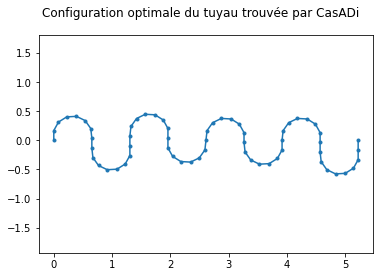

In [22]:
z0 = [0.]*(2*N+2)
optim_simple(z0= z0)

## 3. Modèle global

### Q10) Optimisation avec parterre

In [43]:
x_P = 2
y_P = 1.3
R = 1

In [44]:

def optim_avec_parterre(L=10, N=60, K=10, gamma=3, x_P=2, y_P=0.2, R=0.3, z0=None, plot=True, verbose=False, must_return=False):
    dx = L/N
    if z0 is None:
        z0 = conditions_initiales(L, N)[0]

    # on lance une optimisation avec CasADi
    opti = casadi.Opti()
    # nombre de variables : 
    n = 2 * N + 2
    # notre variable d'optimisation dans CasADi, avec nos notations : 
    z = opti.variable(n)
    # notre fonction à minimiser : 
    f = 0
    # on met les y d'abord : 
    for i in range(N+1):
        f += dx**2 *z[i]**2

    f += K * (z[-1] - L/2)**2

    # on veut minimiser
    opti.minimize(f)
    # on rajoute les contraintes égalité
    opti.subject_to(z[0] == 0) # y_0
    opti.subject_to(z[N] == 0) # y_N
    opti.subject_to(z[N+1] == 0) # x_0

    for i in range(N):
        opti.subject_to((z[N+1 + i+1]-z[N+1 + i])**2 + (z[i+1]-z[i])**2 - dx**2 == 0)

    # on rajoute les contraintes inégalité
    opti.subject_to(z[1]>=0)
    for i in range(N):
        opti.subject_to(z[N+1 + i] - z[N+1 + i+1] <= 0)

    for i in range(N-1):
        opti.subject_to((z[N+1 + i+2] - 2*z[N+1 + i+1] + z[N+1 + i])**2 + (z[i+2] - 2*z[i+1] + z[i])**2 - dx**4 * gamma**2 <= 0)    

    # on rajoute le parterre de fleurs

    for i in range(N+1):
        opti.subject_to(R**2 - (x_P-z[N+1 +i])**2 - (y_P-z[i])**2  <= 0)
    # CI
    opti.set_initial(z,z0)

    # on résoud
    opti.solver('ipopt')
    if verbose:
        sol = opti.solve()
    else:
        with io.capture_output() as captured:
            sol = opti.solve()
    # print(sol.value(z))

    result = sol.value(z)

    if plot:
        plt.figure()
        # les couleurs pour que ça soit joli
        couleur_tuyau = "orange"
        # couleur_parterre = matplotlib.cm.gist_earth(0.6)
        couleur_parterre = matplotlib.cm.PiYG(0.999)


        X = [result[i] for i in range(N+1, 2*N+2)]
        Y = [result[i] for i in range(0, N+1)]
        plt.plot(X, Y, marker='.', color=couleur_tuyau)
        plt.axis('equal')
        plt.suptitle("Configuration optimale du tuyau trouvée par CasADi")

        parterre_fleurs = plt.Circle((x_P, y_P), R, color=couleur_parterre)


        legende_tuyau = plt.Line2D(range(1), range(1),
                                marker="o", color=couleur_tuyau)


        # plt.legend(handles=[matplotlib.patches.Patch(color=couleur_tuyau, label="Tuyau")])

        line1 = plt.Line2D([], [], color=couleur_tuyau, 
                        marker='o',markersize=5, markerfacecolor=couleur_tuyau)
        line2 = plt.Line2D([], [], color="white", 
                        marker='o',markersize=20,markerfacecolor=couleur_parterre)
        plt.legend((line1,line2),('Tuyau','Parterre de fleurs à éviter'))#,numpoints=1, loc=1)
        plt.gca().add_artist(parterre_fleurs)
        plt.show()

    if must_return:
        return result

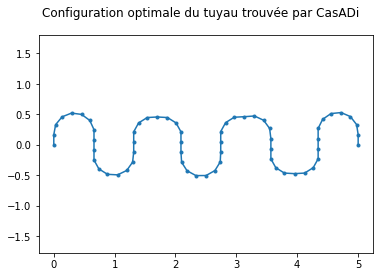

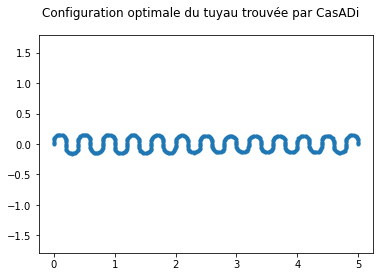

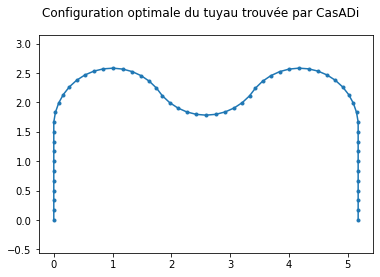

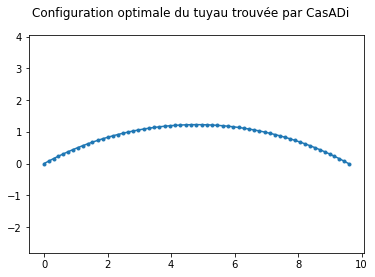

In [49]:
optim_simple()
optim_simple(gamma=10, N=500)
optim_simple(gamma=1)
optim_simple(gamma=0.1)

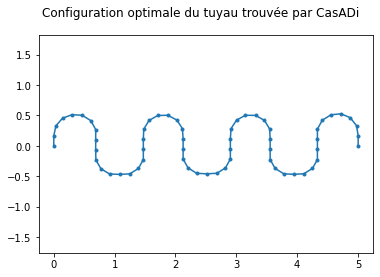

In [42]:
optim_simple(K=10, z0=np.array([0]*(N+1)+[i*dx for i in range(N+1)]))

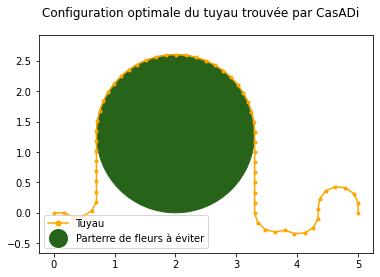

In [50]:
optim_avec_parterre(y_P=1.3,R=1.3)

In [52]:
def optim_avec_parterre_CI_aleatoires(L=10, N=60, K1=10, K2=10, gamma=3, x_P=2, y_P=0.2, R=0.3, z0=None, plot=True, verbose=False, must_return=False, plot_CI=False):
    dx = L/N

    if z0 is None:
        z0 = conditions_initiales(L, N)[0]

    if plot_CI:
        # on dessine la CI
        X = [z0[i] for i in range(N+1, 2*N+2)]
        Y = [z0[i] for i in range(0, N+1)]
        plt.plot(X, Y, marker='.')
        plt.suptitle("Configuration initiale du tuyau donnée à CasADi")
        plt.axis("equal")
        plt.show()

    # on lance une optimisation avec CasADi
    opti = casadi.Opti()
    # nombre de variables : 
    n = 2 * N + 2
    # notre variable d'optimisation dans CasADi, avec nos notations : 
    z = opti.variable(n)
    # notre fonction à minimiser : 
    f = 0
    # on met les y d'abord : 
    for i in range(N+1):
        f += dx**2 *z[i]**2

    f += K1 * (z[-1] - L/2)**2
    f += K2 * z[N]**2

    # on veut minimiser
    opti.minimize(f)
    # on rajoute les contraintes égalité
    opti.subject_to(z[0] == 0) # y_0
    opti.subject_to(z[N+1] == 0) # x_0

    for i in range(N):
        opti.subject_to((z[N+1 + i+1]-z[N+1 + i])**2 + (z[i+1]-z[i])**2 - dx**2 == 0)

    # on rajoute les contraintes inégalité
    for i in range(N):
        opti.subject_to(z[N+1 + i] - z[N+1 + i+1] <= 0)

    for i in range(N-1):
        opti.subject_to((z[N+1 + i+2] - 2*z[N+1 + i+1] + z[N+1 + i])**2 + (z[i+2] - 2*z[i+1] + z[i])**2 - dx**4 * gamma**2 <= 0)    

    # on rajoute le parterre de fleurs

    for i in range(N+1):
        opti.subject_to(R**2 - (x_P-z[N+1 +i])**2 - (y_P-z[i])**2  <= 0)
    # CI
    opti.set_initial(z,z0)

    # on résoud
    opti.solver('ipopt')
    if verbose:
        sol = opti.solve()
    else:
        with io.capture_output() as captured:
            sol = opti.solve()
    # print(sol.value(z))

    result = sol.value(z)

    if plot:
        plt.figure()
        # les couleurs pour que ça soit joli
        couleur_tuyau = "orange"
        # couleur_parterre = matplotlib.cm.gist_earth(0.6)
        couleur_parterre = matplotlib.cm.PiYG(0.999)


        X = [result[i] for i in range(N+1, 2*N+2)]
        Y = [result[i] for i in range(0, N+1)]
        plt.plot(X, Y, marker='.', color=couleur_tuyau)
        plt.axis('equal')
        plt.suptitle("Configuration optimale du tuyau trouvée par CasADi")

        parterre_fleurs = plt.Circle((x_P, y_P), R, color=couleur_parterre)


        legende_tuyau = plt.Line2D(range(1), range(1),
                                marker="o", color=couleur_tuyau)


        # plt.legend(handles=[matplotlib.patches.Patch(color=couleur_tuyau, label="Tuyau")])

        line1 = plt.Line2D([], [], color=couleur_tuyau, 
                        marker='o',markersize=5, markerfacecolor=couleur_tuyau)
        line2 = plt.Line2D([], [], color="white", 
                        marker='o',markersize=20,markerfacecolor=couleur_parterre)
        plt.legend((line1,line2),('Tuyau','Parterre de fleurs à éviter'))#,numpoints=1, loc=1)
        plt.gca().add_artist(parterre_fleurs)
        plt.show()


    if must_return:
        return result

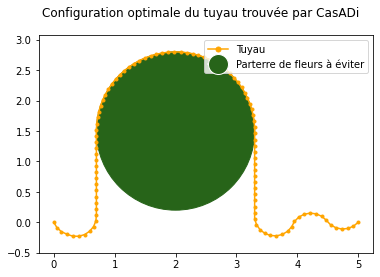

In [53]:
# optim_avec_parterre_CI_aleatoires(K1=1000,y_P=1.3,R=1.3, N=100)
optim_avec_parterre_CI_aleatoires(K1=1000,y_P=1.5,R=1.3, N=100)

In [ ]:
# %matplotlib inline